In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("https://bit.ly/2XZK7Bo")

In [20]:
df.shape

(10000, 14)

In [3]:
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [14]:
# First record
df.head(1)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.0,1,1,1,101348.88,1


In [13]:
# Last record
df.tail(1)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9999,10000,15628319,Walker,792,France,Female,28,NaN,130142.79,1,1,0,38190.78,0


In [15]:
# Checking unique values for dimensions
df["Geography"].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [16]:
df["Gender"].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [17]:
df["Tenure"].value_counts()

1.0     952
2.0     950
8.0     933
3.0     928
5.0     927
7.0     925
4.0     885
9.0     882
6.0     881
10.0    446
0.0     382
Name: Tenure, dtype: int64

In [19]:
df.isna().sum()
# 909 / 10000 null values noted in Tenure

RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure             909
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

In [27]:
# Replacing null values in Tenure with mean
df["Tenure"]=df["Tenure"].fillna(df["Tenure"].mean())

In [28]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [30]:
# Check data type
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure             float64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [48]:
# Drop column Surname as it's inconsequential in the model
df = df.drop(['Surname'], axis = 1)

In [39]:
# Hot encoding Geography & Gender
df_geo=pd.get_dummies(df.Geography,drop_first=True)
df_gender=pd.get_dummies(df.Gender,drop_first=True)

In [38]:
df_geo.head()

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1


In [40]:
df_gender.head()

,Male
0,0
1,0
2,0
3,0
4,0


In [41]:
# Concat the dataset with hot-ecoded data
df = pd.concat([df, df_geo], axis=1)

In [42]:
df = pd.concat([df, df_gender], axis=1)

In [46]:
# Drop Geography & Gender columns
df = df.drop("Geography",axis=1)
df = df.drop("Gender",axis=1)

In [52]:
df = df.drop("RowNumber",axis=1)

In [53]:
df.head()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Germany,Spain,Male
0,15634602,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,15647311,608,41,1.0,83807.86,1,0,1,112542.58,0,0,1,0
2,15619304,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
3,15701354,699,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
4,15737888,850,43,2.0,125510.82,1,1,1,79084.10,0,0,1,0


In [56]:
# Change Exited column position to end
df.loc[:, ["CustomerId","CreditScore","Age","Tenure","Balance","NumOfProducts","HasCrCard","IsActiveMember","EstimatedSalary","Germany","Spain","Male","Exited"]]

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male,Exited
0,15634602,619,42,2.00000,0.00,1,1,1,101348.88,0,0,0,1
1,15647311,608,41,1.00000,83807.86,1,0,1,112542.58,0,1,0,0
2,15619304,502,42,8.00000,159660.80,3,1,0,113931.57,0,0,0,1
3,15701354,699,39,1.00000,0.00,2,0,0,93826.63,0,0,0,0
4,15737888,850,43,2.00000,125510.82,1,1,1,79084.10,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,39,5.00000,0.00,2,1,0,96270.64,0,0,1,0
9996,15569892,516,35,10.00000,57369.61,1,1,1,101699.77,0,0,1,0
9997,15584532,709,36,7.00000,0.00,1,0,1,42085.58,0,0,0,1
9998,15682355,772,42,3.00000,75075.31,2,1,0,92888.52,1,0,1,1


In [61]:
vls = df.values
X = vls[:,0:12]
y = vls[:,12]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1, shuffle=True)

In [62]:
print(y)

[0. 0. 0. ... 0. 1. 0.]


In [63]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot

In [64]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('DTC', DecisionTreeClassifier()))
models.append(('RFC', RandomForestClassifier()))

LR: 0.544250 (0.000250)
DTC: 0.499500 (0.005280)
RFC: 0.524375 (0.015900)


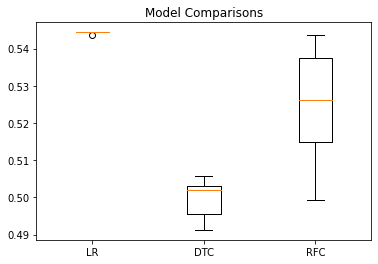

In [65]:
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
# Compare Algorithms
pyplot.boxplot(results, labels=names)
pyplot.title('Model Comparisons')
pyplot.show()

In [ ]:
# The highest accuracy of the 3 models tested is 54%

In [86]:
# Checking imbalance
df["Exited"].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [82]:
features_zeros.shape

(7963, 12)

In [85]:
ds = features_zeros.sample(frac=0.3, random_state=12345)
ds.shape

(2389, 12)

In [89]:
# Downsampling
from sklearn.metrics import f1_score
from sklearn.utils import shuffle

target = df['Exited']
features = df.drop('Exited', axis=1)
features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.25, random_state=12345
)

def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)]
        + [features_ones]
    )
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)]
        + [target_ones]
    )

    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345
    )

    return features_downsampled, target_downsampled


features_downsampled, target_downsampled = downsample(
    features_train, target_train, 0.3
)

model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_downsampled, target_downsampled)
predicted_valid = model.predict(features_valid)
print('F1:', f1_score(target_valid, predicted_valid))


F1: 0.25552825552825553


In [90]:
# Upsampling
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)

    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345
    )

    return features_upsampled, target_upsampled


features_upsampled, target_upsampled = upsample(
    features_train, target_train, 3
)

model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_upsampled, target_upsampled)
predicted_valid = model.predict(features_valid)
print('F1:', f1_score(target_valid, predicted_valid))

F1: 0.20101522842639594
